# accessing twitter data

In [ ]:
import tweepy

In [ ]:
from tweepy import *

import pandas as pd
import csv
import re
import string
import preprocessor as p

In [ ]:
consumer_key = "oaxkqB8QXNITE04OOR8Nrtjj3"
consumer_secret = "U6k0zCVrRz4tbuQRh0Z0zxgOVzVvKxAn0giuU7wRzhDogNUJot"
access_key = "1480447557012578304-ZV2Qwz1Q9KjUkUShYTAhlkFKL118JQ"
access_secret = "sB7ADzbIeNJnFLn2CoFx6cHreMc8rfgWFxYsfdmBFtnzU"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

In [ ]:
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
search_words = "#twitter"
date_since = "2022-01-31"

In [ ]:
lst=[]
count=0
for tweet in api.search_tweets(q=search_words, lang="en",since_id=date_since,count=100):
    print(tweet.text)
    count+=1
    lst.append(tweet.text)

RT @MarvinInuInform: Should #ElonMusk make #MarvinInu the new CEO of #Twitter?😳 $MARVIN https://t.co/nzPb1KxrKa
⚠️ @elonmusk  This Should Be Your New #Twitter Logo‼⚠️

#muskatears #elonmusk #ElonMuskBuyTwitter #tesla… https://t.co/XMzC0t0haI
RT @MarvinInuInform: Should #ElonMusk make #MarvinInu the new CEO of #Twitter?😳 $MARVIN https://t.co/nzPb1KxrKa
RT @nippernine09: There's a RichMan who's sure 
all that glitters is gold
and he's buying the stairway to Twitter
When he gets there he kno…
@ElonCokeBSC @elonmusk @CocaCola Buy some $elonco! ELON COKE to the moon!!!🚀🚀🚀$bnb $eth $ftm $avax $btc $doge $shib… https://t.co/09cxyO1kbd
RT @GerberKawasaki: $17 mil for a lawyer. This company has nowhere to go but up. #twitter $twtr
RT @GerberKawasaki: $17 mil for a lawyer. This company has nowhere to go but up. #twitter $twtr
Good Afternoon #Twitter I am a rising #Chef, #Salisbury #Steak is one of my childhood favs, so it was only right I… https://t.co/ic2CW33JZL
@ElonCokeBSC @elonmusk @CocaCola

In [ ]:
temp = []
for i in lst :
    URLless_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', str(i))
    temp.append(URLless_string)
temp

['RT @MarvinInuInform: Should #ElonMusk make #MarvinInu the new CEO of #Twitter?😳 $MARVIN ',
 '⚠️ @elonmusk  This Should Be Your New #Twitter Logo‼⚠️\n\n#muskatears #elonmusk #ElonMuskBuyTwitter #tesla… ',
 'RT @MarvinInuInform: Should #ElonMusk make #MarvinInu the new CEO of #Twitter?😳 $MARVIN ',
 "RT @nippernine09: There's a RichMan who's sure \nall that glitters is gold\nand he's buying the stairway to Twitter\nWhen he gets there he kno…",
 '@ElonCokeBSC @elonmusk @CocaCola Buy some $elonco! ELON COKE to the moon!!!🚀🚀🚀$bnb $eth $ftm $avax $btc $doge $shib… ',
 'RT @GerberKawasaki: $17 mil for a lawyer. This company has nowhere to go but up. #twitter $twtr',
 'RT @GerberKawasaki: $17 mil for a lawyer. This company has nowhere to go but up. #twitter $twtr',
 'Good Afternoon #Twitter I am a rising #Chef, #Salisbury #Steak is one of my childhood favs, so it was only right I… ',
 '@ElonCokeBSC @elonmusk @CocaCola Hey, @elonmusk when new @CocaCola\n\n#ElonCoke #CokeElon #ElonMusk #BSC #BS

In [ ]:
#lowercase
new_list = []
for i in temp :
    new_string = re.sub(r"[^a-zA-Z0-9]"," ",i)
    new_string = new_string.lower()
    new_list.append(new_string)
new_list

['rt  marvininuinform  should  elonmusk make  marvininu the new ceo of  twitter    marvin ',
 '    elonmusk  this should be your new  twitter logo      muskatears  elonmusk  elonmuskbuytwitter  tesla  ',
 'rt  marvininuinform  should  elonmusk make  marvininu the new ceo of  twitter    marvin ',
 'rt  nippernine09  there s a richman who s sure  all that glitters is gold and he s buying the stairway to twitter when he gets there he kno ',
 ' eloncokebsc  elonmusk  cocacola buy some  elonco  elon coke to the moon       bnb  eth  ftm  avax  btc  doge  shib  ',
 'rt  gerberkawasaki   17 mil for a lawyer  this company has nowhere to go but up   twitter  twtr',
 'rt  gerberkawasaki   17 mil for a lawyer  this company has nowhere to go but up   twitter  twtr',
 'good afternoon  twitter i am a rising  chef   salisbury  steak is one of my childhood favs  so it was only right i  ',
 ' eloncokebsc  elonmusk  cocacola hey   elonmusk when new  cocacola   eloncoke  cokeelon  elonmusk  bsc  bscgems  

In [ ]:
#putting the data in dataframe
df = pd.DataFrame(new_list)
df

,0
0,rt marvininuinform should elonmusk make ma...
1,elonmusk this should be your new twitter...
2,rt marvininuinform should elonmusk make ma...
3,rt nippernine09 there s a richman who s sure...
4,eloncokebsc elonmusk cocacola buy some elo...
...,...
84,rt blogging guide how to claim social media...
85,rt eloncokebsc hey elonmusk you and cocaco...
86,rt eloncokebsc hey elonmusk you and cocaco...
87,dear rwandanyouth on twitter we rise by l...


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\PRABHRAJ
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PRABHRAJ SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
lst_1 = []
for i in new_list :
    words = word_tokenize(i)
    lst_1.append(words)
df_1 = pd.DataFrame(lst_1)
df_1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,rt,marvininuinform,should,elonmusk,make,marvininu,the,new,ceo,of,...,None,None,None,None,None,None,None,None,None,None
1,elonmusk,this,should,be,your,new,twitter,logo,muskatears,elonmusk,...,None,None,None,None,None,None,None,None,None,None
2,rt,marvininuinform,should,elonmusk,make,marvininu,the,new,ceo,of,...,None,None,None,None,None,None,None,None,None,None
3,rt,nippernine09,there,s,a,richman,who,s,sure,all,...,the,stairway,to,twitter,when,he,gets,there,he,kno
4,eloncokebsc,elonmusk,cocacola,buy,some,elonco,elon,coke,to,the,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,rt,blogging,guide,how,to,claim,social,media,handles,blogging,...,None,None,None,None,None,None,None,None,None,None
85,rt,eloncokebsc,hey,elonmusk,you,and,cocacola,would,make,a,...,that,started,eloncoke,cokeelon,elon,None,None,None,None,None
86,rt,eloncokebsc,hey,elonmusk,you,and,cocacola,would,make,a,...,that,started,eloncoke,cokeelon,elon,None,None,None,None,None
87,dear,rwandanyouth,on,twitter,we,rise,by,lifting,others,robert,...,ac,None,None,None,None,None,None,None,None,None


In [ ]:
#stopword removal
stop_words = set(stopwords.words('english'))
lst_2 = []
for st in lst_1 :
    filtered_sentence = []
    for word in st :
        if word not in stop_words :
            filtered_sentence.append(word)
    lst_2.append(filtered_sentence )
print(lst_2)

[['rt', 'marvininuinform', 'elonmusk', 'make', 'marvininu', 'new', 'ceo', 'twitter', 'marvin'], ['elonmusk', 'new', 'twitter', 'logo', 'muskatears', 'elonmusk', 'elonmuskbuytwitter', 'tesla'], ['rt', 'marvininuinform', 'elonmusk', 'make', 'marvininu', 'new', 'ceo', 'twitter', 'marvin'], ['rt', 'nippernine09', 'richman', 'sure', 'glitters', 'gold', 'buying', 'stairway', 'twitter', 'gets', 'kno'], ['eloncokebsc', 'elonmusk', 'cocacola', 'buy', 'elonco', 'elon', 'coke', 'moon', 'bnb', 'eth', 'ftm', 'avax', 'btc', 'doge', 'shib'], ['rt', 'gerberkawasaki', '17', 'mil', 'lawyer', 'company', 'nowhere', 'go', 'twitter', 'twtr'], ['rt', 'gerberkawasaki', '17', 'mil', 'lawyer', 'company', 'nowhere', 'go', 'twitter', 'twtr'], ['good', 'afternoon', 'twitter', 'rising', 'chef', 'salisbury', 'steak', 'one', 'childhood', 'favs', 'right'], ['eloncokebsc', 'elonmusk', 'cocacola', 'hey', 'elonmusk', 'new', 'cocacola', 'eloncoke', 'cokeelon', 'elonmusk', 'bsc', 'bscgems'], ['rt', 'gelflinggirl83', 'new',

In [ ]:
df3 = pd.DataFrame(lst_2)
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,rt,marvininuinform,elonmusk,make,marvininu,new,ceo,twitter,marvin,None,None,None,None,None,None,None,None,None,None
1,elonmusk,new,twitter,logo,muskatears,elonmusk,elonmuskbuytwitter,tesla,None,None,None,None,None,None,None,None,None,None,None
2,rt,marvininuinform,elonmusk,make,marvininu,new,ceo,twitter,marvin,None,None,None,None,None,None,None,None,None,None
3,rt,nippernine09,richman,sure,glitters,gold,buying,stairway,twitter,gets,kno,None,None,None,None,None,None,None,None
4,eloncokebsc,elonmusk,cocacola,buy,elonco,elon,coke,moon,bnb,eth,ftm,avax,btc,doge,shib,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,rt,blogging,guide,claim,social,media,handles,blogging,guide,via,pensignal,handle,twitter,faceboo,None,None,None,None,None
85,rt,eloncokebsc,hey,elonmusk,cocacola,would,make,great,team,decided,help,get,started,eloncoke,cokeelon,elon,None,None,None
86,rt,eloncokebsc,hey,elonmusk,cocacola,would,make,great,team,decided,help,get,started,eloncoke,cokeelon,elon,None,None,None
87,dear,rwandanyouth,twitter,rise,lifting,others,robert,ingersoll,choose,grow,ac,None,None,None,None,None,None,None,None


In [ ]:
#stemming
ps = PorterStemmer()
stemmed_words = []
for st in lst_2 :
    filtered_sentence = []
    for word in st :
        filtered_sentence.append(ps.stem(word))
    stemmed_words.append(filtered_sentence )
stemmed_words

[['rt',
  'marvininuinform',
  'elonmusk',
  'make',
  'marvininu',
  'new',
  'ceo',
  'twitter',
  'marvin'],
 ['elonmusk',
  'new',
  'twitter',
  'logo',
  'muskatear',
  'elonmusk',
  'elonmuskbuytwitt',
  'tesla'],
 ['rt',
  'marvininuinform',
  'elonmusk',
  'make',
  'marvininu',
  'new',
  'ceo',
  'twitter',
  'marvin'],
 ['rt',
  'nippernine09',
  'richman',
  'sure',
  'glitter',
  'gold',
  'buy',
  'stairway',
  'twitter',
  'get',
  'kno'],
 ['eloncokebsc',
  'elonmusk',
  'cocacola',
  'buy',
  'elonco',
  'elon',
  'coke',
  'moon',
  'bnb',
  'eth',
  'ftm',
  'avax',
  'btc',
  'doge',
  'shib'],
 ['rt',
  'gerberkawasaki',
  '17',
  'mil',
  'lawyer',
  'compani',
  'nowher',
  'go',
  'twitter',
  'twtr'],
 ['rt',
  'gerberkawasaki',
  '17',
  'mil',
  'lawyer',
  'compani',
  'nowher',
  'go',
  'twitter',
  'twtr'],
 ['good',
  'afternoon',
  'twitter',
  'rise',
  'chef',
  'salisburi',
  'steak',
  'one',
  'childhood',
  'fav',
  'right'],
 ['eloncokebsc',
  '

In [ ]:
#lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = []
for st in lst_2 :
    filtered_sentence = []
    for word in st :
        filtered_sentence.append(lemmatizer.lemmatize(word))
    lemmatized_words.append(filtered_sentence )
lemmatized_words

[['rt',
  'marvininuinform',
  'elonmusk',
  'make',
  'marvininu',
  'new',
  'ceo',
  'twitter',
  'marvin'],
 ['elonmusk',
  'new',
  'twitter',
  'logo',
  'muskatears',
  'elonmusk',
  'elonmuskbuytwitter',
  'tesla'],
 ['rt',
  'marvininuinform',
  'elonmusk',
  'make',
  'marvininu',
  'new',
  'ceo',
  'twitter',
  'marvin'],
 ['rt',
  'nippernine09',
  'richman',
  'sure',
  'glitter',
  'gold',
  'buying',
  'stairway',
  'twitter',
  'get',
  'kno'],
 ['eloncokebsc',
  'elonmusk',
  'cocacola',
  'buy',
  'elonco',
  'elon',
  'coke',
  'moon',
  'bnb',
  'eth',
  'ftm',
  'avax',
  'btc',
  'doge',
  'shib'],
 ['rt',
  'gerberkawasaki',
  '17',
  'mil',
  'lawyer',
  'company',
  'nowhere',
  'go',
  'twitter',
  'twtr'],
 ['rt',
  'gerberkawasaki',
  '17',
  'mil',
  'lawyer',
  'company',
  'nowhere',
  'go',
  'twitter',
  'twtr'],
 ['good',
  'afternoon',
  'twitter',
  'rising',
  'chef',
  'salisbury',
  'steak',
  'one',
  'childhood',
  'favs',
  'right'],
 ['elonco

In [ ]:
data = pd.DataFrame(lemmatized_words)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,rt,marvininuinform,elonmusk,make,marvininu,new,ceo,twitter,marvin,None,None,None,None,None,None,None,None,None,None
1,elonmusk,new,twitter,logo,muskatears,elonmusk,elonmuskbuytwitter,tesla,None,None,None,None,None,None,None,None,None,None,None
2,rt,marvininuinform,elonmusk,make,marvininu,new,ceo,twitter,marvin,None,None,None,None,None,None,None,None,None,None
3,rt,nippernine09,richman,sure,glitter,gold,buying,stairway,twitter,get,kno,None,None,None,None,None,None,None,None
4,eloncokebsc,elonmusk,cocacola,buy,elonco,elon,coke,moon,bnb,eth,ftm,avax,btc,doge,shib,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,rt,blogging,guide,claim,social,medium,handle,blogging,guide,via,pensignal,handle,twitter,faceboo,None,None,None,None,None
85,rt,eloncokebsc,hey,elonmusk,cocacola,would,make,great,team,decided,help,get,started,eloncoke,cokeelon,elon,None,None,None
86,rt,eloncokebsc,hey,elonmusk,cocacola,would,make,great,team,decided,help,get,started,eloncoke,cokeelon,elon,None,None,None
87,dear,rwandanyouth,twitter,rise,lifting,others,robert,ingersoll,choose,grow,ac,None,None,None,None,None,None,None,None


In [ ]:
#difference
word = 'studies'
print('Stemming : ' , ps.stem(word))
print('Lemmatization : ' , lemmatizer.lemmatize(word))

Stemming :  studi
Lemmatization :  study


In [ ]:
#parts of speech tagging using nltk
for st in lemmatized_words :
    print(nltk.pos_tag(st), end='\n\n')

[('rt', 'NN'), ('marvininuinform', 'NN'), ('elonmusk', 'NN'), ('make', 'VBP'), ('marvininu', 'JJ'), ('new', 'JJ'), ('ceo', 'NN'), ('twitter', 'NN'), ('marvin', 'NN')]

[('elonmusk', 'RB'), ('new', 'JJ'), ('twitter', 'NN'), ('logo', 'NN'), ('muskatears', 'NNS'), ('elonmusk', 'VBP'), ('elonmuskbuytwitter', 'NN'), ('tesla', 'NN')]

[('rt', 'NN'), ('marvininuinform', 'NN'), ('elonmusk', 'NN'), ('make', 'VBP'), ('marvininu', 'JJ'), ('new', 'JJ'), ('ceo', 'NN'), ('twitter', 'NN'), ('marvin', 'NN')]

[('rt', 'NN'), ('nippernine09', 'DT'), ('richman', 'JJ'), ('sure', 'JJ'), ('glitter', 'NN'), ('gold', 'NN'), ('buying', 'VBG'), ('stairway', 'NN'), ('twitter', 'NN'), ('get', 'VBP'), ('kno', 'NN')]

[('eloncokebsc', 'JJ'), ('elonmusk', 'NN'), ('cocacola', 'NN'), ('buy', 'VB'), ('elonco', 'JJ'), ('elon', 'NN'), ('coke', 'VBD'), ('moon', 'NN'), ('bnb', 'NN'), ('eth', 'VBZ'), ('ftm', 'JJ'), ('avax', 'NN'), ('btc', 'NN'), ('doge', 'NN'), ('shib', 'NN')]

[('rt', 'NN'), ('gerberkawasaki', 'NN'), ('17'

[('rt', 'NN'), ('alibradleytv', 'NN'), ('maybe', 'RB'), ('ignorance', 'NN'), ('someone', 'NN'), ('explain', 'VBP'), ('elonmusk', 'JJ'), ('owning', 'NN'), ('twitter', 'NN'), ('different', 'JJ'), ('mark', 'NN'), ('zu', 'NN')]

[('rt', 'NN'), ('spotlight', 'VBD'), ('abby', 'RB'), ('biggest', 'JJS'), ('joy', 'NN'), ('peterobi4president', 'NN'), ('seeing', 'VBG'), ('ordinary', 'JJ'), ('nigerian', 'JJ'), ('like', 'IN'), ('twitter', 'NN'), ('follower', 'VBP'), ('5', 'CD'), ('20', 'CD'), ('lt', 'NN'), ('500', 'CD')]

[('elihants', 'NNS'), ('1goonrich', 'CD'), ('richiesouf', 'NN'), ('catbsc', 'NN'), ('8', 'CD'), ('5k', 'CD'), ('mc', 'NN'), ('aped', 'VBD'), ('bag', 'JJ'), ('takeover', 'NN'), ('catcoin', 'NN'), ('help', 'NN')]

[('rt', 'NN'), ('brandenlmendoza', 'NN'), ('made', 'VBD'), ('decision', 'NN'), ('eloncokebsc', 'NN'), ('coin', 'VB'), ('new', 'JJ'), ('favorite', 'JJ'), ('coin', 'NN'), ('eloncokebsc', 'NN'), ('eloncoke', 'VBD'), ('cokeelon', 'NN'), ('elonmusk', 'NN'), ('bsc', 'NN')]

[('r

In [ ]:
pos = []
for st in lemmatized_words :
    pos.append(nltk.pos_tag(st))

noun = []
adverb = []
adjective = []
preposition = []
verb = []
for i in pos :
    for j in i :
        if (j[1] == "NN" or j[1] == "NNS" or j[1] == "NNP" or j[1] == "NNPS") :
            noun.append(j[0])
        if (j[1] == "VB" or j[1] == "VBG" or j[1] == "VBP" or j[1] == "VBD" or j[1] == "VBN") :
            verb.append(j[0])
        if (j[1] == "RB") :
            adverb.append(j[0])
        if (j[1] == "JJ") :
            adjective.append(j[0])
        if (j[1] == "IN") :
            preposition.append(j[0])

In [ ]:
print(noun[:20])

['rt', 'marvininuinform', 'elonmusk', 'ceo', 'twitter', 'marvin', 'twitter', 'logo', 'muskatears', 'elonmuskbuytwitter', 'tesla', 'rt', 'marvininuinform', 'elonmusk', 'ceo', 'twitter', 'marvin', 'rt', 'glitter', 'gold']


In [ ]:
print(verb[:20])

['make', 'elonmusk', 'make', 'buying', 'get', 'buy', 'coke', 'go', 'go', 'rising', 'steak', 'elonmusk', 'eloncoke', 'gelflinggirl83', 'need', 'boost', 'leaving', 'concerned', 'buying', 'concerned']


In [ ]:
print(adverb[:20])

['elonmusk', 'nowhere', 'twitter', 'twtr', 'nowhere', 'twitter', 'twtr', 'much', 'away', 'enter', 'back', 'later', 'actually', 'eloncoke', 'also', 'bye', 'eloncoke', 'eloncoke', 'weekly', 'nishishere']


In [ ]:
print(adjective[:20])

['marvininu', 'new', 'new', 'marvininu', 'new', 'richman', 'sure', 'eloncokebsc', 'elonco', 'ftm', 'good', 'eloncokebsc', 'new', 'new', 'cover', 'top', 'fbpeglobal', 'last', 'follow', 'u']


In [ ]:
print(preposition[:20])

['like', 'like', 'via', 'like', 'since', 'without', 'auston', 'like', 'whether', 'next', 'like', 'like', 'via', 'via']


In [ ]:
!pip install wordcloud

In [ ]:
words = []
for i in lemmatized_words :
    for j in i :
        if j != 'rt' :
            words.append(j)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
total_len = len(words)
total_len

1030

In [ ]:
freq = nltk.FreqDist(words)
top_ten = freq.most_common(10)
top_ten

[('twitter', 59),
 ('elonmusk', 53),
 ('eloncokebsc', 31),
 ('cocacola', 20),
 ('new', 18),
 ('elon', 17),
 ('eloncoke', 17),
 ('make', 15),
 ('cokeelon', 15),
 ('help', 14)]

In [ ]:
top_ten_words=[]
for i in top_ten:
    top_ten_words.append(i[0])
top_ten_words

['twitter',
 'elonmusk',
 'eloncokebsc',
 'cocacola',
 'new',
 'elon',
 'eloncoke',
 'make',
 'cokeelon',
 'help']

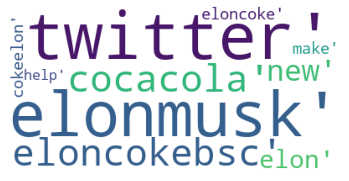

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud(background_color = 'white').generate(str(top_ten_words))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
mask = np.array(Image.open("heart_mask.jpg"))
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000,
                      random_state=1,
                      background_color='white',
                      colormap='Set2' ,
                      collocations=False,
                      stopwords = STOPWORDS,
                      mask=mask).generate(str(top_ten_words))

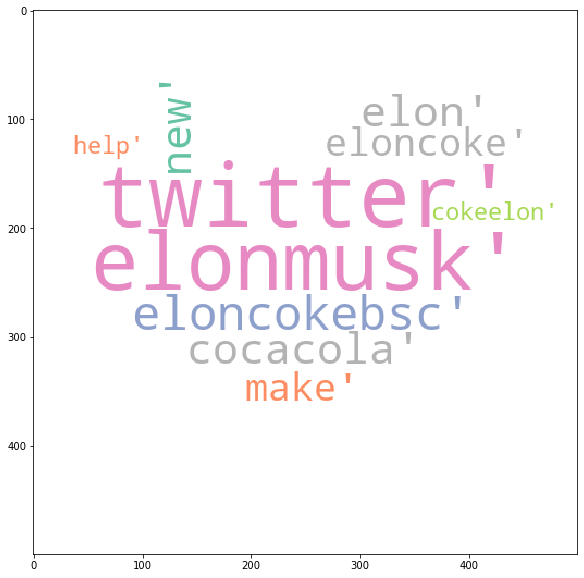

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='none')
plt.show()
wordcloud.to_file("heart_mask-wordlcoud.jpg")